# Exercise 5: Create your own personal face recognition using SVM

## Instructions:

Create a directory in your google drive using this folder structure

```
My Drive
- Images
  - Train
    - Elizer
      - elizerimage1.jpg
      ...
    - Eliza
      - elizaimage1.jpg
      ...
    - Elijah
      - elijahimage1.jpg
      ...
  - Test
    - testimage1.jpg
    ...
```

- Upload 190 images of your self (selfied are recommended) in the Train folder
- Upload 190 images of your partner in the Train folder
- Upload 10 images each of yourself and your partner in the Test Folder (30 images total for each member)
- Use **.png** or **.jpg** or **.jpeg** images files

In [141]:
pip install numpy opencv-python scikit-learn

## Import libraries

In [142]:
import os
import cv2
import numpy as np
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt

## Mount Google Drive

In [143]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Display one raw image directly from your drive

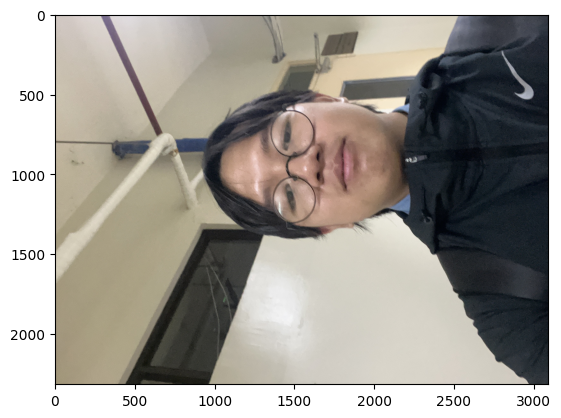

In [144]:
def display_image(image_path: str):
  image = Image.open(image_path)
  plt.imshow(image)
  plt.axis('on')
  plt.show()
display_image('/content/drive/My Drive/Selfies/Images/Train/Dan/IMG_1121.JPG')

## 2. Load the images from your drive and apply preprocessing to your raw images

In [137]:
def preprocess_images(folder):
  images = []
  labels = []

  for label, person in enumerate(os.listdir(folder)):
    person_folder = os.path.join(folder, person)
    person_name = person.split('.')[0]
    for filename in os.listdir(person_folder):
      image_path = os.path.join(person_folder, filename)
      image = cv2.imread(image_path)
      if image is not None:
          image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
          image = cv2.resize(image, (100, 100))
          images.append(image.flatten())
          labels.append(person_name)
      else:
          print(f"Warning: Could not load image at {image_path}")

  return np.array(images), np.array(labels)
images, labels= preprocess_images('/content/drive/My Drive/Selfies/Images/Train')

## 3. Display one pre-processed image from the training set

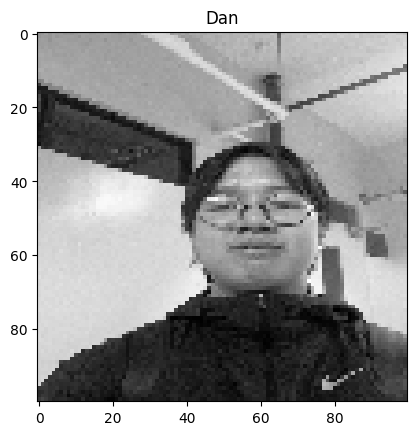

In [138]:
image = images[0].reshape(100,100)
name = labels[0]

plt.imshow(image, cmap="gray")
plt.title(name)
plt.axis('on')
plt.show()

## 4. Display ten pre-processed images from the training set

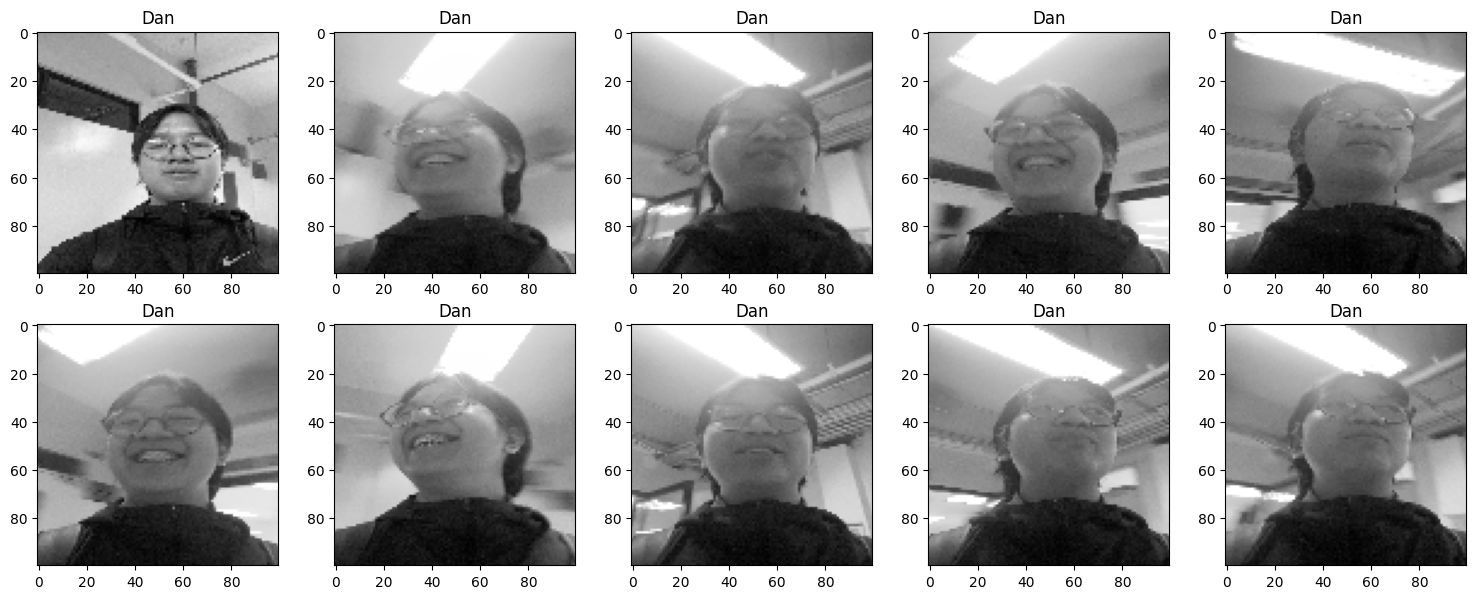

In [139]:
num_faces = 10

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()
for i in range(num_faces):
    image = images[i].reshape(100,100)
    name = labels[i]

    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(name)
    axes[i].axis('on')

# Adjust layout
plt.tight_layout()
plt.show()

## 5. Split your training data

In [145]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


## 6. Train your SVM model

In [146]:
from sklearn import svm

model = svm.SVC(gamma='scale')  # You can choose different kernels like 'linear', 'rbf', etc.
model.fit(X_train, y_train)

SVC()

## 7. Evaluate your SVM model

In [140]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


## 8. Test your model using images not in your training set

Use your SVM model to predict the label of all of your images in the Test folder

In [147]:
def test_images(folder, model):
  image = cv2.imread(folder)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image, (100, 100)).flatten().reshape(1, -1)
  prediction = model.predict(image)
  return prediction

Predicted label: ['Dan']


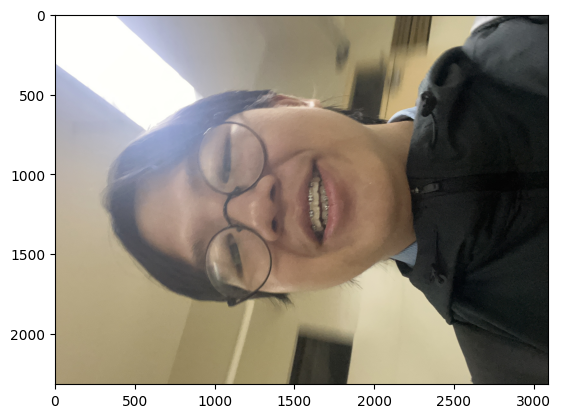

In [148]:
# Dan
image_path = '/content/drive/My Drive/Selfies/Images/Test/IMG_1314.JPG'
result = test_images(image_path, model)
print(f"Predicted label: {result}")
display_image(image_path)

Predicted label: ['Darren']


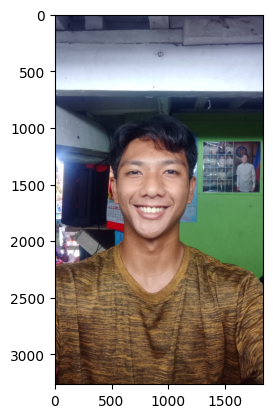

In [149]:
# Darren
image_path = '/content/drive/My Drive/Selfies/Images/Test/IMG_20230208_100354.jpg'
result = test_images(image_path, model)
print(f"Predicted label: {result}")
display_image(image_path)

Predicted label: ['Jonel']


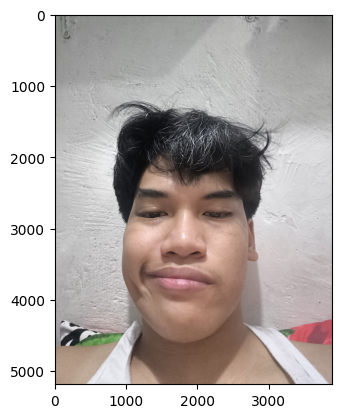

In [150]:
# Jonel
image_path = '/content/drive/My Drive/Selfies/Images/Test/IMG_20250930_213948.jpg'
result = test_images(image_path, model)
print(f"Predicted label: {result}")
display_image(image_path)